# Importing Essential Libraries for Preprocessing

In [19]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from skopt.space import Real, Integer, Categorical
from skopt import gp_minimize
from skopt.plots import plot_convergence
from sklearn.ensemble import ExtraTreesRegressor


# Extracting imputed database

In [2]:
db = pd.read_csv('FeNiCo_comp-prop_imp.csv')
db = db.iloc[:,1:]
db

,Fe,Co,Ni,V,Mo,Cr,Cu,Mn,C,W,...,Si,Ms,Hc,Tc,ER,TS,YS,Elong,HV,Cost
0,100.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.23,39.40,724.00,8.56,NaN,NaN,40.00,104.96,0.42
1,99.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.24,72.22,739.00,11.90,NaN,NaN,40.00,104.25,0.77
2,98.00,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.25,97.21,753.00,14.13,NaN,NaN,40.00,103.76,1.11
3,97.00,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.26,119.77,767.00,15.94,NaN,NaN,40.00,103.52,1.45
4,96.00,4.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.27,147.59,780.00,17.64,NaN,NaN,40.00,103.50,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,49.25,49.25,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.24,966.00,964.41,29.86,NaN,NaN,7.35,265.30,21.77
1204,49.25,49.25,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.21,1066.00,964.41,29.86,NaN,NaN,7.35,265.30,21.77
1205,49.25,49.25,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.30,383.00,964.41,29.86,NaN,NaN,7.35,265.30,21.77
1206,49.25,49.25,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.28,351.00,964.41,29.86,NaN,NaN,7.35,265.30,21.77


In [3]:
db = pd.concat([db.iloc[:,:19],db.iloc[:,21:]], axis=1)
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fe      1208 non-null   float64
 1   Co      1208 non-null   float64
 2   Ni      1208 non-null   float64
 3   V       1208 non-null   float64
 4   Mo      1208 non-null   float64
 5   Cr      1208 non-null   float64
 6   Cu      1208 non-null   float64
 7   Mn      1208 non-null   float64
 8   C       1208 non-null   float64
 9   W       1208 non-null   float64
 10  Ta      1208 non-null   float64
 11  Nb      1208 non-null   float64
 12  Al      1208 non-null   float64
 13  Ti      1208 non-null   float64
 14  Si      1208 non-null   float64
 15  Ms      1208 non-null   float64
 16  Hc      1208 non-null   float64
 17  Tc      1208 non-null   float64
 18  ER      1208 non-null   float64
 19  Elong   1208 non-null   float64
 20  HV      1208 non-null   float64
 21  Cost    1208 non-null   float64
dtype

#### Extracting input columns and all the desired properties

In [4]:
X = db.iloc[:,:-7]
X.head()

,Fe,Co,Ni,V,Mo,Cr,Cu,Mn,C,W,Ta,Nb,Al,Ti,Si
0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,99.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,98.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,97.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,96.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
y = pd.concat([db.iloc[:,-7],np.log10(db.iloc[:,-6]),np.log10(db.iloc[:,-5]+273),np.log10(db.iloc[:,-4:])],axis=1)
y.rename(columns = {'Hc' : 'logHc', 'ER' : 'logER', 'Tc':'logTc', 'Elong':'logEl', 'HV':'logHV', 'Cost':'logCost'}, inplace = True)
y.head()

,Ms,logHc,logTc,logER,logEl,logHV,logCost
0,2.23,1.595496,2.998695,0.932474,1.60206,2.021024,-0.376751
1,2.24,1.858657,3.005181,1.075547,1.60206,2.018076,-0.113509
2,2.25,1.987711,3.011147,1.150142,1.60206,2.016030,0.045323
3,2.26,2.078348,3.017033,1.202488,1.60206,2.015024,0.161368
4,2.27,2.169057,3.022428,1.246499,1.60206,2.014940,0.252853


In [6]:
y.describe()

,Ms,logHc,logTc,logER,logEl,logHV,logCost
count,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000
mean,1.870512,2.379639,3.015561,1.300742,1.107513,2.358218,1.095313
std,0.521928,0.936677,0.114848,0.262828,0.471990,0.178517,0.391752
min,0.210000,-1.809668,2.348305,0.724276,-0.522879,1.809492,-0.376751
25%,1.580000,1.849849,2.946452,1.139879,0.811575,2.224093,0.894870
50%,2.069000,2.648272,3.080626,1.288473,0.949390,2.370124,1.225180
75%,2.260000,3.050819,3.094471,1.477157,1.602060,2.476832,1.368287
max,2.550000,3.930174,3.143951,2.081239,1.903090,2.927396,1.556664


In [7]:
scalerX = StandardScaler()
X_transform = scalerX.fit_transform(X)
scalerY = StandardScaler()
y_transform = scalerY.fit_transform(y)

In [8]:
features = X.columns.values
features

array(['Fe', 'Co', 'Ni', 'V', 'Mo', 'Cr', 'Cu', 'Mn', 'C', 'W', 'Ta',
       'Nb', 'Al', 'Ti', 'Si'], dtype=object)

In [9]:
response = y.columns.values
response

array(['Ms', 'logHc', 'logTc', 'logER', 'logEl', 'logHV', 'logCost'],
      dtype=object)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_transform, y_transform, test_size=0.2, random_state=0)

# Defining functions to calculate CV metric scores

In [11]:
from sklearn import metrics

# Function to return the mean of the metric for a particular metric name
def metrics_mean(y_ac, y_pred, metric):
    score = {'Ms':[],'logHc':[],'logTc':[],'logER':[], 'logElong':[],'logHV':[], 'logCost':[]}
    n = ['Ms','logHc','logTc','logER','logElong', 'logHV', 'logCost']
    if metric == 'rmse':
        for i in range(len(n)):
            score[n[i]].append(np.sqrt(metrics.mean_squared_error(y_ac[:,i], y_pred[:,i])))
    elif metric == 'mae':
        for i in range(len(n)):
            score[n[i]].append(metrics.mean_absolute_error(y_ac[:,i], y_pred[:,i]))
    elif metric == 'R2':
        for i in range(len(n)):
            score[n[i]].append(metrics.r2_score(y_ac[:,i], y_pred[:,i]))
    else:
        for i in range(len(n)):
            score[n[i]] = np.inf
    return score

# Final function "plot" to plot the train-train predicted values, test-test predicted values and the metrics for
# each ML algorithm used
def plot(regressor_name, y_train, y_train_pred, y_test, y_test_pred):
    
    y_train = scalerY.inverse_transform(y_train)
    y_pred_train = scalerY.inverse_transform(y_train_pred)
    y_test = scalerY.inverse_transform(y_test)
    y_pred_test = scalerY.inverse_transform(y_test_pred)

    n = ['Ms','logHc','logTc','logER','logElong', 'logHV', 'logCost']
    xtl = [r'$M_s$', r'$log_{10}H_c$', r'$log_{10}T_c$', r'$log_{10}\rho$', r'$log_{10}\delta$', r'$log_{10}H_V$', r'$log_{10}Cost$']
    f, axes = plt.subplots(len(n), 2, figsize=(12,35))
    
    # training set
    for i in range(len(n)):
        # plot "predicted values vs actual values and true predictions" graph for train set using first prediction
        axes[i,0].scatter(y_train[:,i],y_pred_train[:,i])
        axes[i,0].plot(y_train[:,i],y_train[:,i],'k--',lw=3)

        axes[i,0].set_xlabel('Experimental Value',fontsize=16,labelpad=10)
        axes[i,0].set_ylabel('Predicted Value',fontsize=16,labelpad=10)
        for label in (axes[i,0].get_xticklabels() + axes[i,0].get_xticklabels()):
            label.set_fontsize(12)

        # calculate the metrics
        rmse = metrics_mean(y_train,y_pred_train,'rmse')  
        mae = metrics_mean(y_train,y_pred_train,'mae')
        R2 = metrics_mean(y_train,y_pred_train,'R2')
        
        # regressor name with all metrics in the title
        axes[i,0].set_title('Train set'
        +'\nRMSE for '+xtl[i]+': '+str(round(rmse[n[i]][0],3))
        +'\nMAE for '+xtl[i]+': '+str(round(mae[n[i]][0],3))
        +'\nR2 for '+xtl[i]+': '+str(round(R2[n[i]][0],3)),fontsize=16, pad=10)
    
    # test set
    for i in range(len(n)):
        # plot "predicted values vs actual values and true predictions" graph for train set using first prediction
        axes[i,1].scatter(y_test[:,i],y_pred_test[:,i])
        axes[i,1].plot(y_test[:,i],y_test[:,i],'k--',lw=3)
        
        axes[i,1].set_xlabel('Experimental Value',fontsize=16,labelpad=10)
        axes[i,1].set_ylabel('Predicted Value',fontsize=16,labelpad=10)
        for label in (axes[i,1].get_xticklabels() + axes[i,1].get_xticklabels()):
            label.set_fontsize(12)
        
        # calculate the metrics
        rmse = metrics_mean(y_test,y_pred_test,'rmse')  
        mae = metrics_mean(y_test,y_pred_test,'mae')
        R2 = metrics_mean(y_test,y_pred_test,'R2')
        
        # regressor name with all metrics in the title
        axes[i,1].set_title('Test set'
        +'\nRMSE for '+xtl[i]+': '+str(round(rmse[n[i]][0],3))
        +'\nMAE for '+xtl[i]+': '+str(round(mae[n[i]][0],3))
        +'\nR2 for '+xtl[i]+': '+str(round(R2[n[i]][0],3)),fontsize=16, pad=10)
    
    plt.tight_layout()
    plt.show()

    # return metrics for test set to record the errors across different algorithms
    return rmse, mae, R2

Empty metrics dictionaries to store the metrics for every ML algorithm

In [12]:
rmse_scores = {}
mae_scores = {}
R2_scores = {}

# Extra Trees Regression

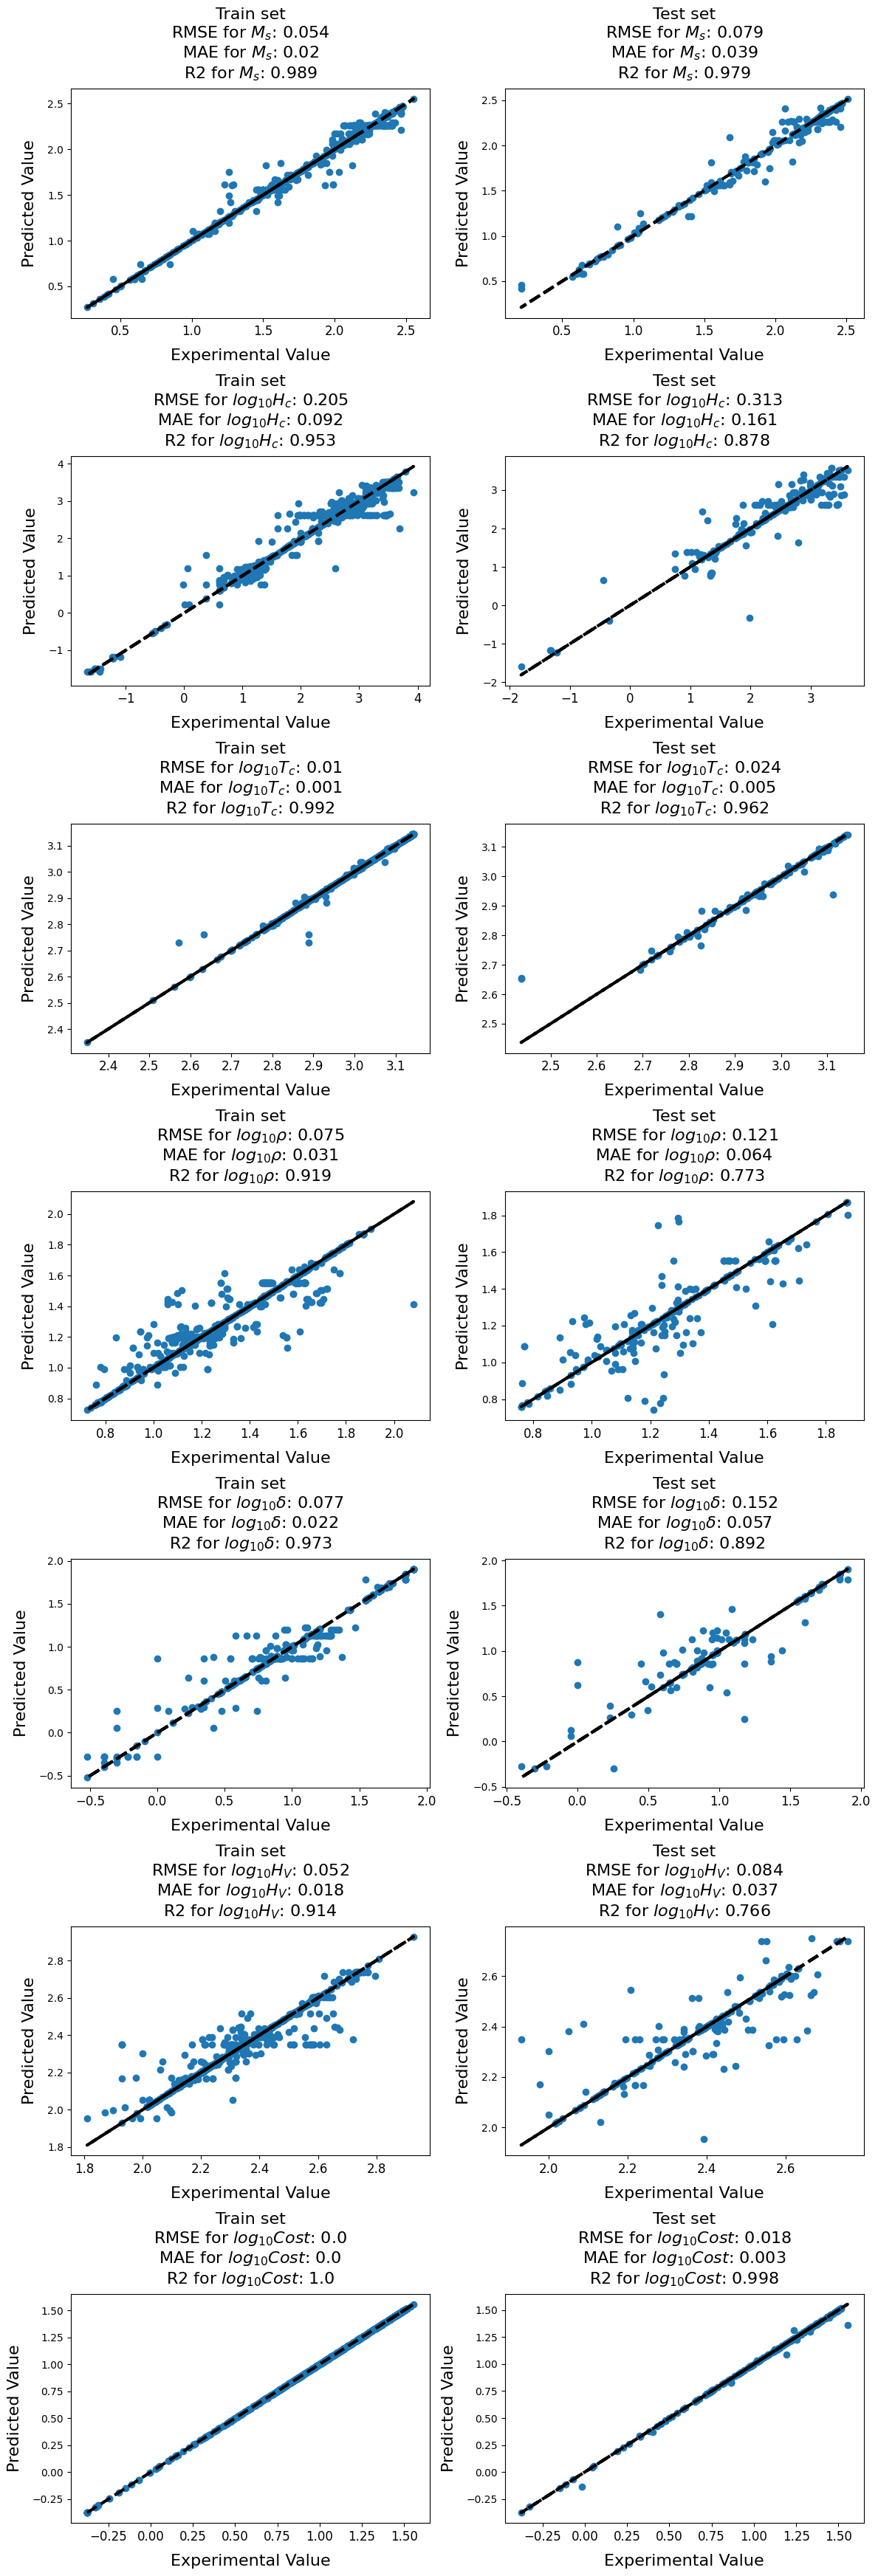

In [13]:
# Extra Trees Regression
etregressor = ExtraTreesRegressor(n_estimators=230, max_depth=81, min_samples_split=2, min_samples_leaf=1, random_state=0)

etregressor.fit(X_train,y_train)
y_pred_train = etregressor.predict(X_train)
y_pred_test = etregressor.predict(X_test)

rmse, mae, R2 = plot('Extra Trees', y_train, y_pred_train, y_test, y_pred_test)

rmse_scores['Extra Trees'] = rmse
mae_scores['Extra Trees'] = mae
R2_scores['Extra Trees'] = R2

# Bayesian Optimization

In [14]:
# Define our search space
x_space = [Real(0,100),Real(0,100),Real(0,100)]
for i in range(3,15):
    x_space.append(Real(0,0.001))

x_space

[Real(low=0, high=100, prior='uniform', transform='identity'),
 Real(low=0, high=100, prior='uniform', transform='identity'),
 Real(low=0, high=100, prior='uniform', transform='identity'),
 Real(low=0, high=0.001, prior='uniform', transform='identity'),
 Real(low=0, high=0.001, prior='uniform', transform='identity'),
 Real(low=0, high=0.001, prior='uniform', transform='identity'),
 Real(low=0, high=0.001, prior='uniform', transform='identity'),
 Real(low=0, high=0.001, prior='uniform', transform='identity'),
 Real(low=0, high=0.001, prior='uniform', transform='identity'),
 Real(low=0, high=0.001, prior='uniform', transform='identity'),
 Real(low=0, high=0.001, prior='uniform', transform='identity'),
 Real(low=0, high=0.001, prior='uniform', transform='identity'),
 Real(low=0, high=0.001, prior='uniform', transform='identity'),
 Real(low=0, high=0.001, prior='uniform', transform='identity'),
 Real(low=0, high=0.001, prior='uniform', transform='identity')]

In [15]:
def f(X):
    x = (np.array(X)/sum(X)*100).reshape(1,-1)
    transformed = scalerX.transform(x)
    y_pred = etregressor.predict(transformed)
    predicted = scalerY.inverse_transform(y_pred)
    
    target_err_1 = 0
    for i in range(len(target)):
        if target[i] != None:
            target_err_1 = target_err_1 + weight[i]*abs(target[i] - predicted[0][i])
    
    objective = target_err_1
    
    return objective

In [16]:
#Targets
targets = [[1.5, None, np.log10(970), None, None, None, np.log10(15)],
           [1.75, None, np.log10(1000), None, None, None, np.log10(11.5)],
           [1.75, None, np.log10(1143), None, None, None, np.log10(19)],
           [2, None, np.log10(1070), None, None, None, np.log10(10.5)],
           [2.2, None, np.log10(1173), None, None, None, np.log10(10)],
           [2.4, None, np.log10(1173), None, None, None, np.log10(10)]]

In [17]:
targets_df = pd.DataFrame(targets)
targets_df.to_excel("BO_MPR-ETR_Targets_FeCoNi_wt-const.xlsx")

In [18]:
weight = [1, 1, 1, 1, 1, 1, 1]

c:\Users\shakt\miniconda3\envs\tf\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\shakt\miniconda3\envs\tf\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\shakt\miniconda3\envs\tf\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\shakt\miniconda3\envs\tf\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\shakt\miniconda3\envs\tf\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\shakt\miniconda3\envs\tf\lib\site-packages\skl

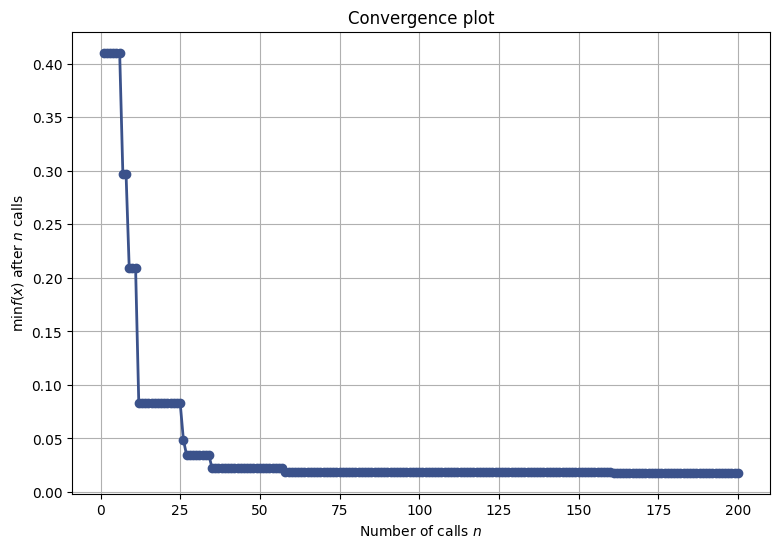

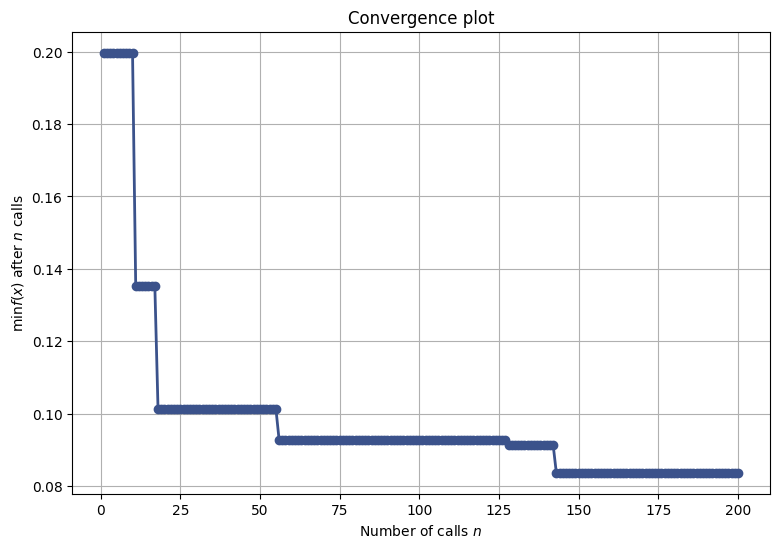

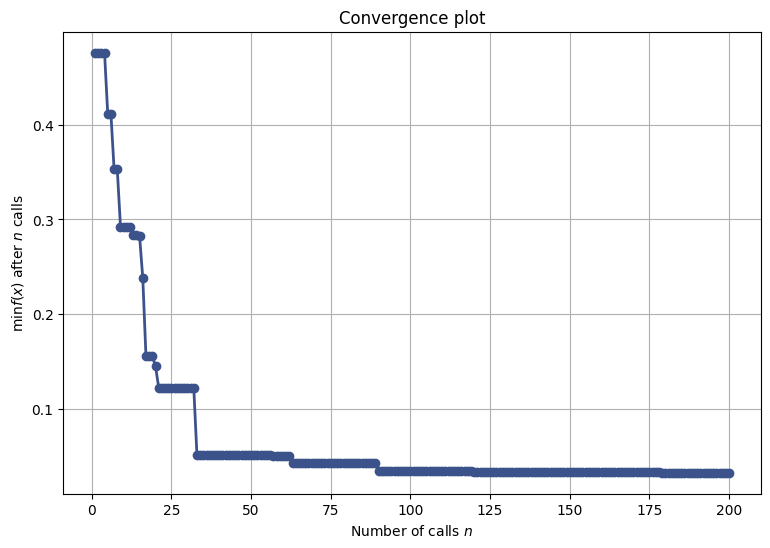

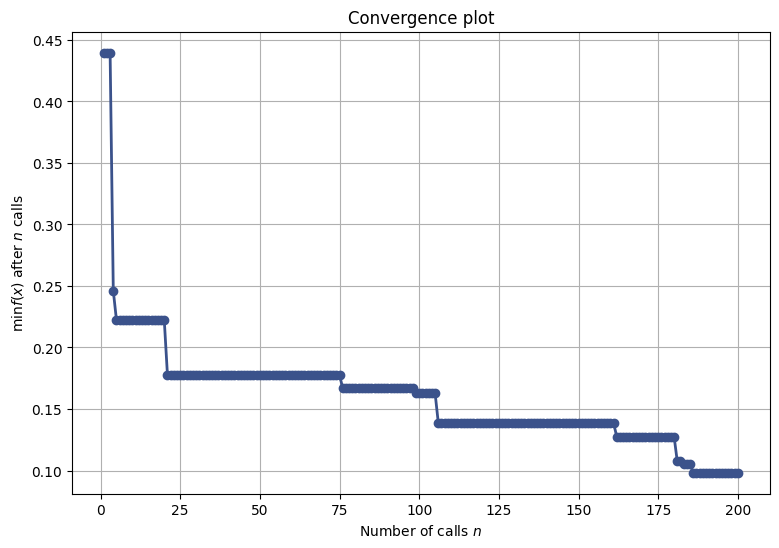

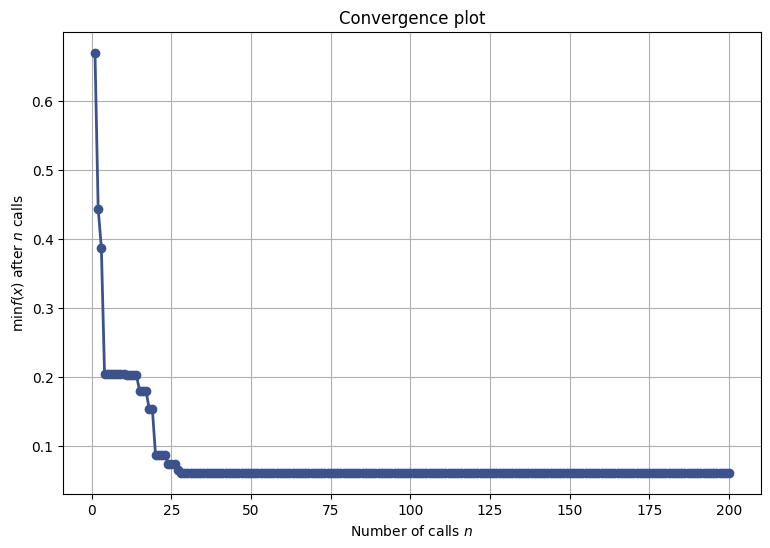

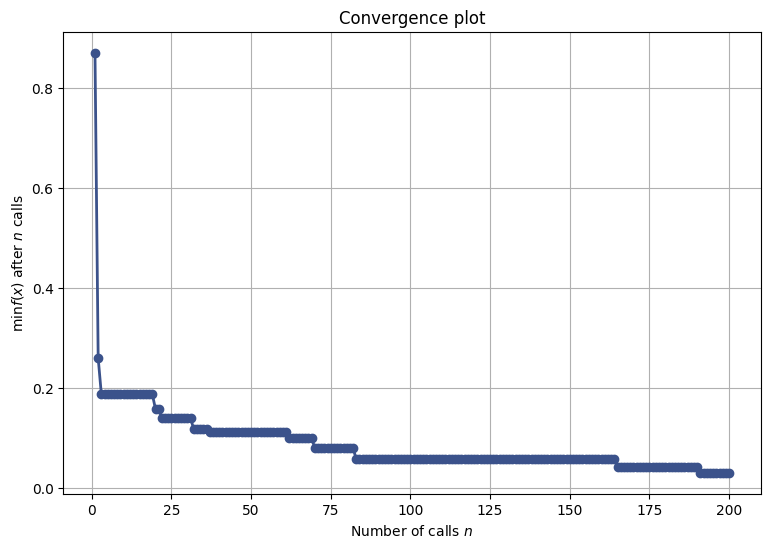

In [38]:
for i in range(len(targets)):
    target = targets[i]
    res = gp_minimize(f,                  # the function to minimize
                      x_space,      # the bounds on each dimension of x
                      acq_func="EI",      # the acquisition function
                      n_calls=200,         # the number of evaluations of f
                      n_random_starts=5,  # the number of random initialization points
                      random_state=42,   # the random seed
                      xi=0.01,
                      n_jobs=-1)
    
    fig, ax = plt.subplots(1,1,figsize=(9,6))
    ax = plot_convergence(res)
    filename = f'Convergence_{i}_ETR.png'
    fig.savefig(filename)

    for j in range(200):
        temp1 = pd.DataFrame(np.round((np.array(res.x_iters[j])/sum(res.x_iters[j])*100),2).reshape(1,-1), columns=features, index=[j])
        transformed = scalerX.transform(temp1)
        y_pred = etregressor.predict(transformed)
        predicted = scalerY.inverse_transform(y_pred)
        temp2 = pd.DataFrame(predicted, columns=response, index=[j])
        temp3 = pd.DataFrame(np.round(res.func_vals[j],2), columns = ['Objective'], index=[j])
        if j==0:
            temp_db = pd.concat([temp1,temp2,temp3],axis=1)
        else:
            temp4 = pd.concat([temp1,temp2,temp3],axis=1)
            temp_db = pd.concat([temp_db,temp4],axis=0)
    
    temp_db = temp_db.sort_values('Objective')
    if i==0:
        res_df = temp_db.iloc[:5,:]
    else:
        res_df = pd.concat([res_df,temp_db.iloc[:5,:]])
    
    res_df.to_excel('BO_MPR-ETR_Results_FeCoNi_wt-const.xlsx')

# Neural Network - 4 hidden layers - Wen alloy features

In [22]:
# Adding WenAlloys features
from pymatgen.core import Composition
from matminer.featurizers.composition.alloy import WenAlloys

elem = db.columns[:15].tolist()
form_list = []
for i in range(db.shape[0]):
    formula = ''
    for j in elem:
        if not db[j][i]==0:
            formula+=j
            formula+=str(db[j][i])
    form_list.append(formula)

db['pretty_formula']=form_list

# function to get the Wen alloys features for every composition
def get_alloy_features(form_list):
    wen_alloys = WenAlloys()
    feat_list = []
    for i in form_list:
        wen_alloys = WenAlloys()
        comp = Composition(i)
        all_features = wen_alloys.featurize(comp)
        feat_list.append(np.array(all_features[2:]))
    return np.stack(feat_list,axis=0)

a = get_alloy_features(form_list)

In [23]:
a.shape

(1208, 23)

In [24]:
X = np.array(db.iloc[:,:-8])
X.shape

(1208, 15)

In [25]:
X_all = np.concatenate([X,a],axis=1)
X_all.shape

(1208, 38)

In [39]:
features = db.iloc[:,:15].columns.values
features

array(['Fe', 'Co', 'Ni', 'V', 'Mo', 'Cr', 'Cu', 'Mn', 'C', 'W', 'Ta',
       'Nb', 'Al', 'Ti', 'Si'], dtype=object)

In [41]:
wen_features = wen_alloys.feature_labels()
add = np.array(wen_features[2:])
add

array(['Yang delta', 'Yang omega', 'APE mean', 'Radii local mismatch',
       'Radii gamma', 'Configuration entropy', 'Atomic weight mean',
       'Total weight', 'Lambda entropy', 'Electronegativity delta',
       'Electronegativity local mismatch', 'VEC mean', 'Mixing enthalpy',
       'Mean cohesive energy', 'Interant electrons',
       'Interant s electrons', 'Interant p electrons',
       'Interant d electrons', 'Interant f electrons',
       'Shear modulus mean', 'Shear modulus delta',
       'Shear modulus local mismatch', 'Shear modulus strength model'],
      dtype='<U32')

In [42]:
features_all = np.concatenate([features,add],axis=0)
features_all

array(['Fe', 'Co', 'Ni', 'V', 'Mo', 'Cr', 'Cu', 'Mn', 'C', 'W', 'Ta',
       'Nb', 'Al', 'Ti', 'Si', 'Yang delta', 'Yang omega', 'APE mean',
       'Radii local mismatch', 'Radii gamma', 'Configuration entropy',
       'Atomic weight mean', 'Total weight', 'Lambda entropy',
       'Electronegativity delta', 'Electronegativity local mismatch',
       'VEC mean', 'Mixing enthalpy', 'Mean cohesive energy',
       'Interant electrons', 'Interant s electrons',
       'Interant p electrons', 'Interant d electrons',
       'Interant f electrons', 'Shear modulus mean',
       'Shear modulus delta', 'Shear modulus local mismatch',
       'Shear modulus strength model'], dtype=object)

In [26]:
scalerX = StandardScaler()
X_transform = scalerX.fit_transform(X_all)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_transform, y_transform, test_size=0.2, random_state=0)

In [28]:
#Loading pre-trained model
from tensorflow import keras

nn4_wen = keras.models.load_model("C:/Users/shakt/Desktop/FeCoNi-db_MPR_NN-4lay")
nn4_wen.summary()

Model: "property_prediction_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 38)]              0         
                                                                 
 dense (Dense)               (None, 256)               9984      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 7)                 231       
                                                                 
Total params: 53,447
Trainable params: 53

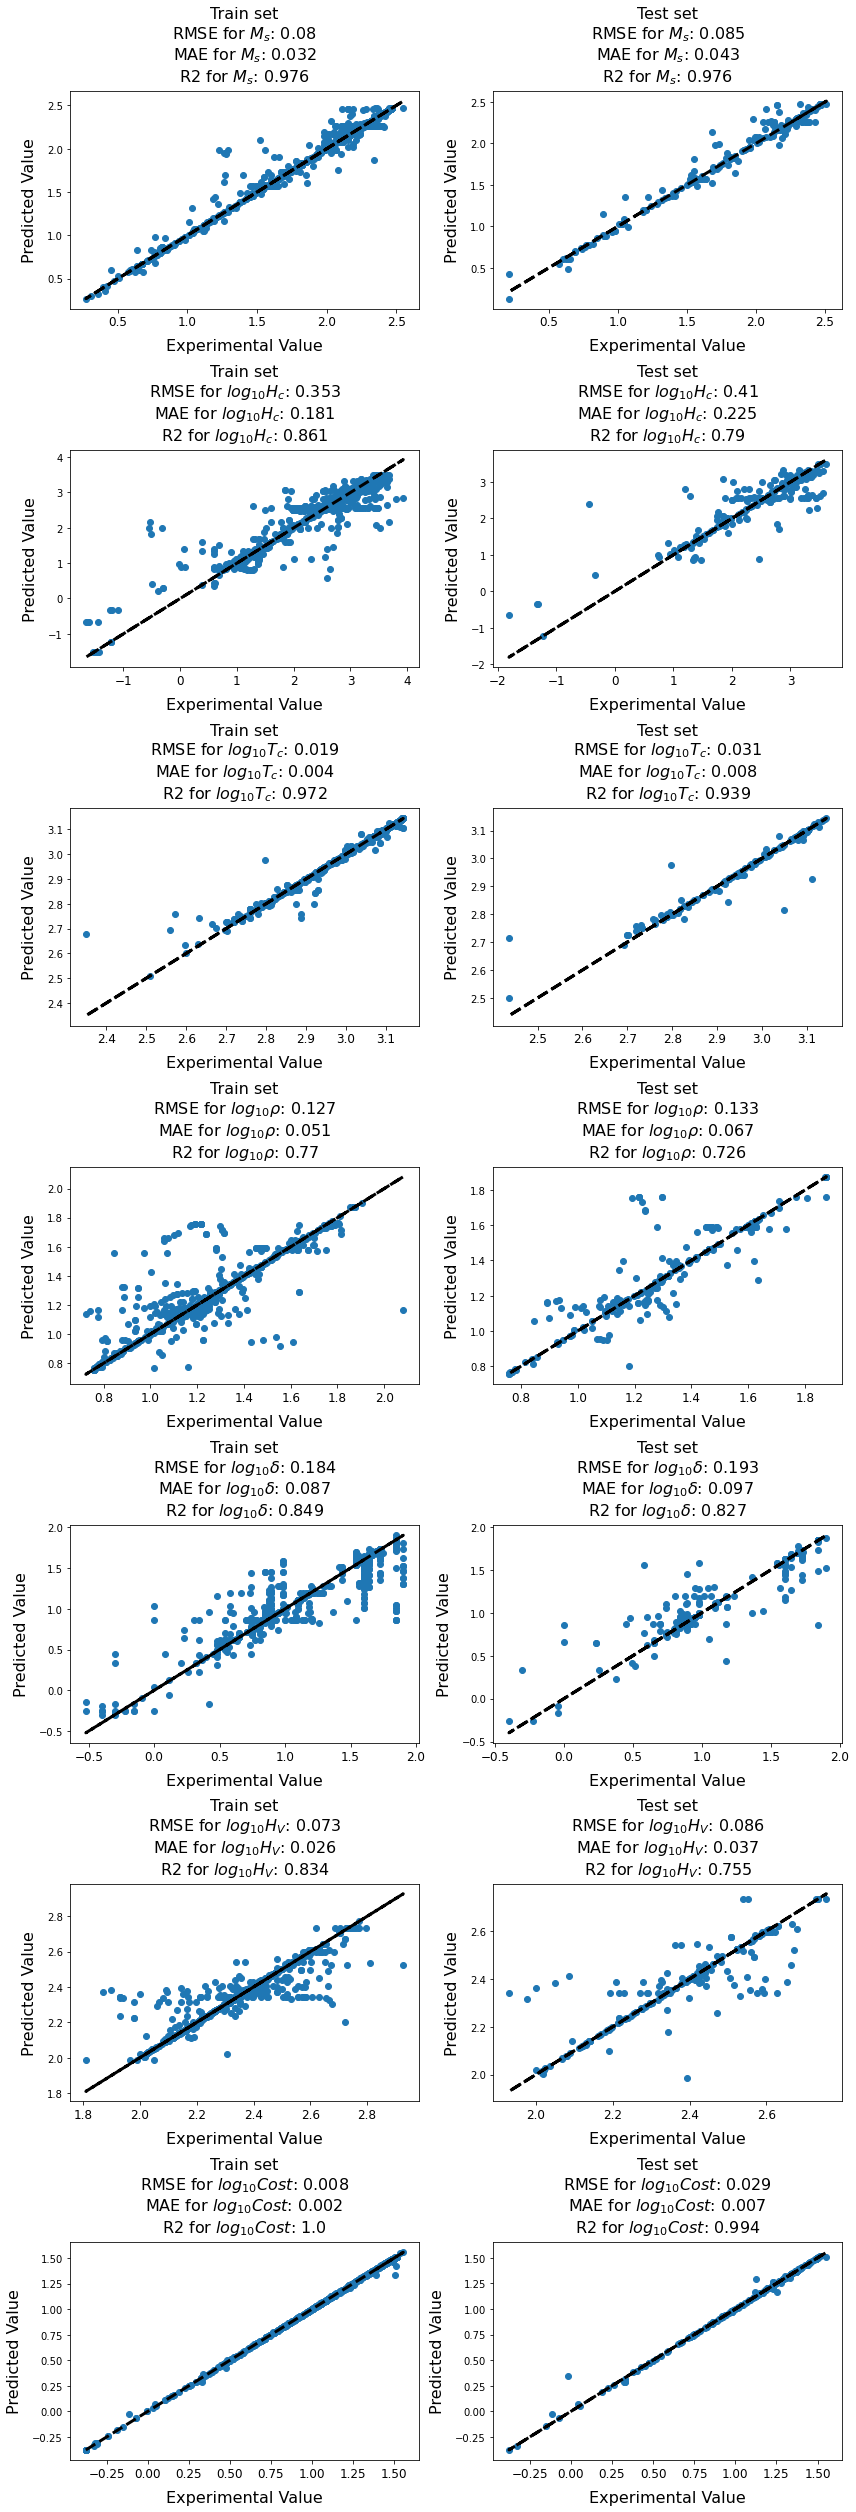

In [29]:
# Use the trained Keras model to predict on the training and test sets
y_pred_train=nn4_wen.predict(X_train)
y_pred_test=nn4_wen.predict(X_test)

# Plot the training results
rmse, mae, R2 = plot('NN 4 layers Wen', y_train, y_pred_train, y_test, y_pred_test)

rmse_scores['NN 4 layers Wen'] = rmse
mae_scores['NN 4 layers Wen'] = mae
R2_scores['NN 4 layers Wen'] = R2

# Bayesian Optimization

In [30]:
# Define our search space
x_space = [Real(0,100),Real(0,100),Real(0,100)]
for i in range(3,15):
    x_space.append(Real(0,0.001))

x_space

[Real(low=0, high=100, prior='uniform', transform='identity'),
 Real(low=0, high=100, prior='uniform', transform='identity'),
 Real(low=0, high=100, prior='uniform', transform='identity'),
 Real(low=0, high=0.001, prior='uniform', transform='identity'),
 Real(low=0, high=0.001, prior='uniform', transform='identity'),
 Real(low=0, high=0.001, prior='uniform', transform='identity'),
 Real(low=0, high=0.001, prior='uniform', transform='identity'),
 Real(low=0, high=0.001, prior='uniform', transform='identity'),
 Real(low=0, high=0.001, prior='uniform', transform='identity'),
 Real(low=0, high=0.001, prior='uniform', transform='identity'),
 Real(low=0, high=0.001, prior='uniform', transform='identity'),
 Real(low=0, high=0.001, prior='uniform', transform='identity'),
 Real(low=0, high=0.001, prior='uniform', transform='identity'),
 Real(low=0, high=0.001, prior='uniform', transform='identity'),
 Real(low=0, high=0.001, prior='uniform', transform='identity')]

In [36]:
def f(X):
    x = np.round(np.array(X)/sum(X)*100,2)
    
    elem = db.columns[:15].tolist()
    formula = ''
    for j in range(len(elem)):
        if not x[j]==0:
            formula+=elem[j]
            formula+=str(x[j])
    comp = Composition(formula)
    wen_alloys = WenAlloys()
    a_feat = wen_alloys.featurize(comp)
    x_al = np.concatenate([x,np.array(a_feat[2:])])
    
    transformed = scalerX.transform(x_al.reshape(1, -1))
    y_pred = nn4_wen.predict(transformed)
    predicted = scalerY.inverse_transform(y_pred)
    
    target_err_1 = 0
    for i in range(len(target)):
        if target[i] != None:
            target_err_1 = target_err_1 + weight[i]*abs(target[i] - predicted[0][i])
    
    objective = target_err_1
    
    return objective

In [32]:
#Targets
targets = [[1.5, None, np.log10(970), None, None, None, np.log10(15)],
           [1.75, None, np.log10(1000), None, None, None, np.log10(11.5)],
           [1.75, None, np.log10(1143), None, None, None, np.log10(19)],
           [2, None, np.log10(1070), None, None, None, np.log10(10.5)],
           [2.2, None, np.log10(1173), None, None, None, np.log10(10)],
           [2.4, None, np.log10(1173), None, None, None, np.log10(10)]]

In [33]:
targets_df = pd.DataFrame(targets)
targets_df.to_excel("BO_MPR-NNR-4lay-Wen_Targets_FeCoNi_wt-const.xlsx")

In [34]:
weight = [1, 1, 1, 1, 1, 1, 1]

In [43]:
for i in range(len(targets)):
    target = targets[i]
    res = gp_minimize(f,                  # the function to minimize
                      x_space,      # the bounds on each dimension of x
                      acq_func="EI",      # the acquisition function
                      n_calls=200,         # the number of evaluations of f
                      n_random_starts=5,  # the number of random initialization points
                      random_state=42,   # the random seed
                      xi=0.01,
                      n_jobs=-1)
    
    for j in range(200):
        temp = np.round((np.array(res.x_iters[j])/sum(res.x_iters[j])*100),2)
        elem = db.columns[:15].tolist()
        formula = ''
        for i in range(len(elem)):
            if not temp[i]==0:
                formula+=elem[i]
                formula+=str(temp[i])
        comp = Composition(formula)
        wen_alloys = WenAlloys()
        a_feat = wen_alloys.featurize(comp)
        temp0 = np.concatenate([temp,a_feat[2:]])
        temp0 = pd.DataFrame(temp0.reshape(1,-1), columns=features_all, index=[j])
        transformed = scalerX.transform(temp0)
        y_pred = nn4_wen.predict(transformed)
        predicted = scalerY.inverse_transform(y_pred)
        temp1 = pd.DataFrame(temp.reshape(1,-1), columns=features, index=[j])
        temp2 = pd.DataFrame(predicted, columns=response, index=[j])
        temp3 = pd.DataFrame(np.round(res.func_vals[j],2), columns = ['Objective'], index=[j])
        if j==0:
            temp_db = pd.concat([temp1,temp2,temp3],axis=1)
        else:
            temp4 = pd.concat([temp1,temp2,temp3],axis=1)
            temp_db = pd.concat([temp_db,temp4],axis=0)
    
    temp_db = temp_db.sort_values('Objective')
    if i==0:
        res_df = temp_db.iloc[:5,:]
    else:
        res_df = pd.concat([res_df,temp_db.iloc[:5,:]])
    
    res_df.to_excel('BO_MPR-NNR-4lay-Wen_Results_FeCoNi_wt-const.xlsx')

c:\Users\shakt\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\shakt\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\shakt\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\shakt\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\shakt\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\shakt\anaconda3\envs\tensorflow-gpu\lib\site-packages\sk